In [13]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA
import scipy.linalg.interpolative
import random
import matplotlib.pyplot as plt
import cvxpy as cp
from IPython.core.display import display, HTML

C:\Users\Shamita\AppData\Local\Temp\ipykernel_10344\975880566.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [14]:
def l1_minimization(m,N,s,N_mc):
    
    probability=[]
    m_val=[]
    diff_l1=[]
    diff_it=[]
    val=[]
    for m in range (20,m,20):
        succ=0  #initialize succesful attempts as 0

        m_val.append(m)  #the vector m_val stores the values of m for every iteration
        
        for i in range(N_mc):  #for every iteration, generate a new measurement matrix, x vector and corresponding vector y
            A=np.random.randn(m,N) 
            x =np.zeros((N,1))

            import random
            randomlist = random.sample(range(0, N-1), s)  # indeces for non zero values

            from random import random

            for i in randomlist:
                x[i]=random()   #putting random non zero, s values to define vector x 

            y=A.dot(x)  # calculating the corresponding vector 

            
            # to solve argmin ||z|| subject to Az = y
            z_n= cp.Variable((N,1))
            z=cp.norm(z_n,1)

            prob = cp.Problem(cp.Minimize(z),[A@z_n==y])  #min  z st A*z_n=y
            prob.solve(abstol=1e-15) 

            z_star=hard_thresh(z_n.value,s) #values for the vector after minimization

            if (LA.norm((x-z_star),2)/LA.norm(x,2))<1e-3: #determinimg success if the values are satisfed
                succ=succ+1

            # finding the difference between actual and calculated values of x to determine relaive error
            diff=z_star-x 
            val.append(LA.norm(diff))
            diff_l1.append(LA.norm(diff))
        
        probability.append(succ/N_mc) #calculating the probability dependig on the number of successful iterations
    
    return m_val,probability,diff_l1     


In [15]:
def iht_algo (A,y,s,h,max_iter,tol,xn,x,N):
    iteration=0
    rel_incr=10       
    xn1=np.zeros((N,1))  
    
    #the while loop is run till the no of iterations if less than maximum iteration and relative increment greater then the tolerance
    
    while iteration<max_iter and rel_incr>tol:
        
        # x[n+1] = Hs(x[n]+h A_trans(y-Ax[n]))
        A_trans=A.transpose() # A transpose
        xn1=xn+(h*(A_trans.dot((y-(A.dot(xn))))))  #x[n+1]
        xn1=hard_thresh(xn1,s)  #hard threshold for x[n+1]
        
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1) # realtive increment 
        
        xn=xn1 # replace xn with x[n+1] and continue the loop
           
    return xn

In [16]:
def IHT(N,m,s,N_mc,h):
    prob=[]
    m_val=[]
    residual=[]
    diff_iht=[]
    
    for m in range (20,m,20):
        succ=0     #initialize succesful attempts as 0
        m_val.append(m)

        for iter_mc in range(N_mc):
            #for every iteration, generate a new measurement matrix, x vector and corresponding vector y
            
            A=np.random.randn(m,N)  
            x =np.zeros((N,1))
            a=LA.norm(A,2)
            A=A/(a)
            
            import random
            randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
            from random import random
        
            for i in randomlist:
                x[i]=random()   #putting random non zero, s values to define vector x 

            y=A.dot(x)  # calculating the corresponding vector y

            xn=np.zeros((N,1))  # initialize xn as zero vector
            xnplus1=iht_algo(A,y,s,h,100,1e-8,xn,x,N)  #iht algorithm
            
            # finding the difference between actual and calculated values of x to determine relaive error
            diff=xnplus1-x
            diff_iht.append(LA.norm(diff))
            
            residual.append(LA.norm((A.dot(xnplus1))-y))
        
            if (LA.norm((x-xnplus1),2)/LA.norm(x,2))<1e-3:  #determining the success
                succ=succ+1

        prob.append(succ/N_mc)  #calculating the probability dependig on the number of successful iterations
        
    return m_val,prob,diff_iht,residual

In [17]:
def nsiht_algo (A,y,s,e,h,max_iter,xn,x,tol,N):
    iteration=0
    rel_incr=10
    
    I=np.identity(N)  #identity matrix
    xn1=np.zeros((N,1)) #initialize x[n+1] as zero vector
    
    #the while loop is run till the no of iterations if less than maximum iteration and relative increment greater then the tolerance  
    while iteration<max_iter and rel_incr>tol:
        
        A_trans=A.transpose()
        inv=(A_trans.dot(A))+(e*I)
        inv=np.linalg.inv(inv) 
        
        #nsiht algorithm
        xn1=xn+(h*inv.dot((A_trans.dot(y-A.dot(xn)))))      
        xn1=hard_thresh(xn1,s)
       
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1) # realtive increment
        iteration=iteration+1      
        xn=xn1    # replace xn with x[n+1] and continue the loop
           
    return xn 

In [18]:
def NSIHT (N,m,s,N_mc,e,h):
    prob=[]
    m_val=[]
    diff_nsiht=[]
    residual=[]
    
    for m in range (20,m,20):
        succ=0    #initialize succesful attempts as 0
        m_val.append(m)
        
        for iter_mc in range(N_mc):
        #for every iteration, generate a new measurement matrix, x vector and corresponding vector y
        
            A=np.random.randn(m,N)  
            x =np.zeros((N,1))
            a=LA.norm(A,2)
            A=A/(a)
            xminusxnorm=[]
            import random
            randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
            from random import random

            for i in randomlist:
                x[i]=random()    #putting random non zero, s values to define vector x 

            y=A.dot(x)      # calculating the corresponding vector y
            
            xn=np.zeros((N,1))  # initialize vectors x[n] and x[n+1] as zero vector
            xn1=np.zeros((N,1)) 

            x_star=nsiht_algo(A,y,s,e,h,700,xn,x,1e-6,N)   #nsiht algorithm

            if (LA.norm((x-x_star),2)/LA.norm(x,2))<1e-3:  #determining the success
                        succ=succ+1
                    
            # finding the difference between actual and calculated values of x to determine relaive error
            diff=x_star-x
            diff_nsiht.append(LA.norm(diff))
            residual.append(LA.norm((A.dot(x_star))-y))
        
        prob.append(succ/N_mc)  #calculating the probability dependig on the number of successful iterations
        
    return m_val,prob,diff_nsiht,residual

In [19]:
def hard_thresh(x_vec,s):  #input vector x_vec and sparsity level s
    n=len(x_vec) #length of the vector
    val=[]   #empty list to store the indices of s largest elements in x_vec
    
    x_vec_temp=np.array  #store vecor in temporary vector
    x_vec_temp=np.absolute(x_vec)  #store absolute values of vector
    ind=x_vec_temp.argsort(axis=0) #indices of absolute values arranged in order
    
    val=ind[-s:] #indices of s largest values
    
    for i in range(n):
        if i not in val:
            x_vec[i]=0 #values at all indices other than the s largest elements set too zero
      
    return(x_vec)

Following the above observations, we determine the best sparsity levels for each of the algorithms and then compare the three algorithms with their best level of sprsity.

From the different levels of sparsity, we obtain the best graphs for the sparsity level 3.

We now compare the IHT and NSIHT algorithms in terms of their iterations for N_mc number of times

In [70]:
m=200
N=200
s=3
N_mc=5
h=1
e=1


In [71]:
def iht_vs_nsiht(m,N,s,N_mc,h,e):
    
    iht_rel_err=[]
    iht_resi=[]
    
    nsiht_rel_err=[]
    nsiht_resi=[]
    
    for i in range(N_mc):
        
    
        iteration=0
        max_iter=100
        tol=1e-10

        iht_res_val=[]
        nsiht_res_val=[]

        A=np.random.randn(m,N) # measurement matrix
        x =np.zeros((N,1))
        a=LA.norm(A,2)
        A=A/(a)

        import random
        randomlist = random.sample(range(0, N-1), s) # indeces for non zero value
        from random import random

        for i in randomlist:
            x[i]=random()  

        y=A.dot(x)  

        xn_iht=np.zeros((N,1))
        xn1_iht=np.zeros((N,1)) #xn+1

        xn_iht=np.zeros((N,1))
        rel_err_iht=[]
        resi_iht=[]
        rel_incr=10

        xn1_iht=np.zeros((N,1)) #xn+1

        while iteration<max_iter and rel_incr>tol:
            A_trans=A.transpose()
            xn1_iht=xn_iht+(h*(A_trans.dot((y-(A.dot(xn_iht))))))
            xn1_iht=hard_thresh(xn1_iht,s)

            resi_iht.append(LA.norm((A.dot(xn1_iht))-y))       
            rel_err_iht.append(LA.norm(xn_iht-x))
            iteration=iteration+1       
            xn_iht=xn1_iht
            
        iht_rel_err.append(rel_err_iht)
        iht_resi.append(resi_iht)
    

        xn_nsiht=np.zeros((N,1))
        resi_nsiht=[]
        rel_err_nsiht=[]

        rel_incr=10

        iteration=0
        I=np.identity(N)
        xn1_nsiht=np.zeros((N,1)) #xn+1

        while iteration<max_iter and rel_incr>tol:

            A_trans=A.transpose()
            inv=(A_trans.dot(A))+(e*I)
            inv=np.linalg.inv(inv) 
            xn1_nsiht=xn_nsiht+(h*inv.dot((A_trans.dot(y-A.dot(xn_nsiht)))))      
            xn1_nsiht=hard_thresh(xn1_nsiht,s)

            resi_nsiht.append(LA.norm((A.dot(xn1_nsiht))-y))
            iteration=iteration+1
            rel_err_nsiht.append(LA.norm(xn_nsiht-x))
            xn_nsiht=xn1_nsiht
            
        
        nsiht_rel_err.append(rel_err_nsiht)
        nsiht_resi.append(resi_nsiht)


        
    
    return iht_rel_err, iht_resi, nsiht_rel_err, nsiht_resi
    
            
            
            
            



In [72]:
resi_iht,resi_nsiht,rel_err_iht,rel_err_nsiht=iht_vs_nsiht(m,N,s,N_mc,h,e)

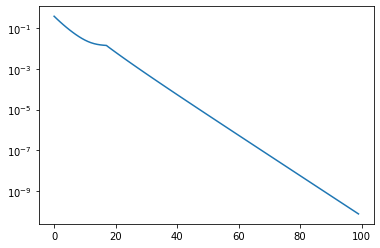

In [85]:
plt.plot(resi_nsiht[2])
plt.yscale('log')

In [86]:
len(resi_nsiht)

5

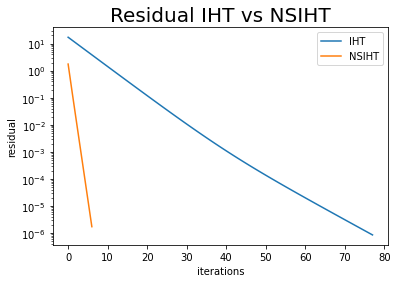

In [101]:
plt.title('Residual IHT vs NSIHT',fontsize=20)

plt.plot(residual_iht)
plt.plot(residual_nsiht)

plt.legend(['IHT', 'NSIHT'])
plt.xlabel('iterations')
plt.ylabel('residual')
plt.yscale('log')

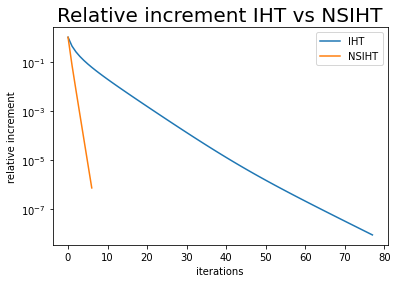

In [102]:
plt.title('Relative increment IHT vs NSIHT',fontsize=20)

plt.plot(rel_inc_iht)
plt.plot(rel_inc)

plt.legend(['IHT', 'NSIHT'])
plt.xlabel('iterations')
plt.ylabel('relative increment')
plt.yscale('log')

Define the function recovery_plots to plot the probability of recover for the algorithms vs the value of m

In [34]:
def recovery_plots(m_val,prob_l1,prob_iht,prob_nsiht):
    plt.title('Probability of recovery',fontsize=20)

    # plot the probability of success for the three algorithms vs the values of m to show the probability at different values of m
    plt.plot(m_val,prob_l1)
    plt.plot(m_val,prob_iht)
    plt.plot(m_val,prob_nsiht)


    plt.legend(['L1 min', 'IHT', 'NSIHT'])
    plt.xlabel('m')
    plt.ylabel('recovery probability ')

    plt.show()

Define the function relative_error to plot the difference between the x vector recovered and calculated x for N_mc no of times at the various values of m

In [38]:
def relative_error(diff_l1,diff_iht,diff_nsiht,N_mc,m):
    
    #split the values of difference between the vector x calculated and obtained for each iteration, at different values for m as separate lists
    l1_val = [diff_l1[i:i+N_mc] for i in range(0, len(diff_l1), N_mc)]
    iht_val = [diff_iht[i:i+N_mc] for i in range(0, len(diff_iht), N_mc)]
    nsiht_val = [diff_nsiht[i:i+N_mc] for i in range(0, len(diff_nsiht), N_mc)]
    
    k=len(l1_val) 
    v=[]
    
    for i in range(20,m,20):
        v.append(i) 
        
    j=int(N_mc-1)/2
    j=int(j)
    
    print('\033[1m' +"ERROR IN RECOVERY AT DIFFERENT VALUES FOR m" )
    for i in range(k):
        plt.title( v[i],fontsize=13)    
        plt.plot(l1_val[i])
        plt.plot(iht_val[i])
        plt.plot(nsiht_val[i])
        plt.yscale('log')
        plt.legend(['L1 min', 'IHT', 'NSIHT'])
        plt.ylabel('relative error')
        plt.xlabel('iteratios')
        plt.show()

    

We now compare the three algorithms for the best sparsity level i.e 3

In [49]:
m=200
N=200
s=3
N_mc=25

In [50]:
m_val,prob_l1,diff_l1,resi_1=l1_minimization(m,N,s,N_mc)

In [51]:
m_i,prob_iht,diff_iht,resi_1=IHT(m,N,s,N_mc,1)

In [52]:
ms,prob_nsiht,diff_nsiht_resi1=NSIHT(m,N,s,N_mc,1,1)

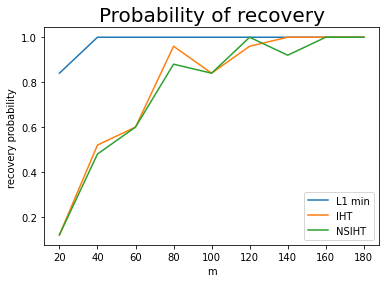

In [53]:
recovery_plots(m_val,prob_l1,prob_iht,prob_nsiht)

ERROR IN RECOVERY AT DIFFERENT VALUES FOR m


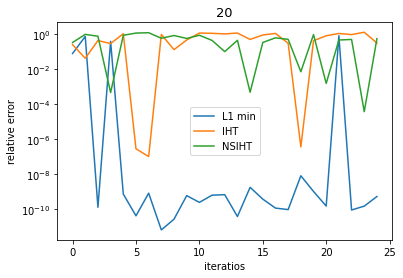

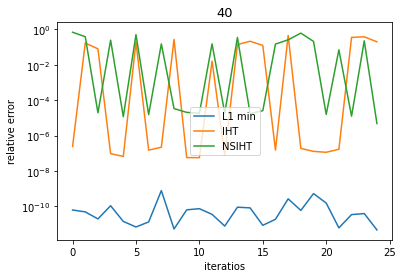

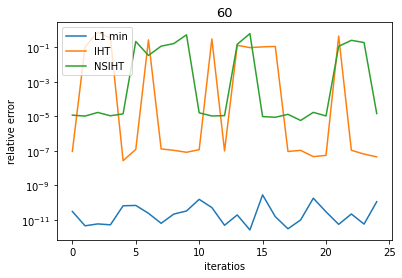

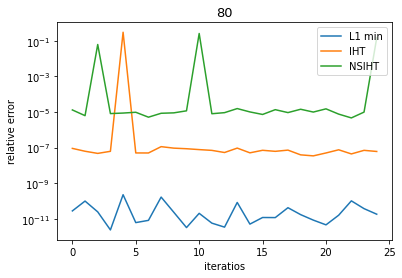

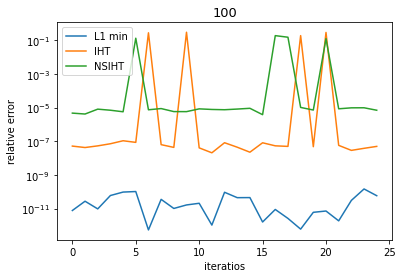

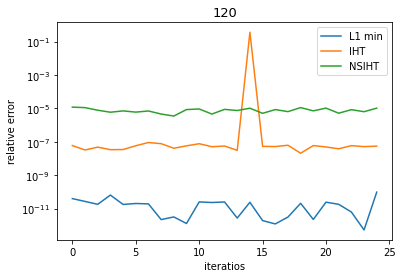

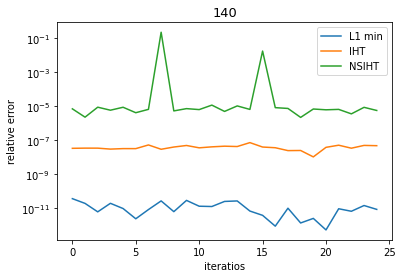

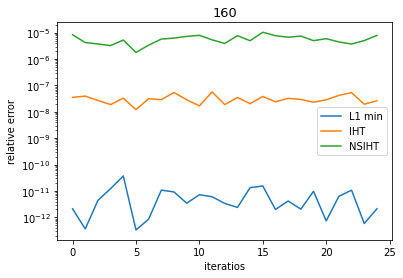

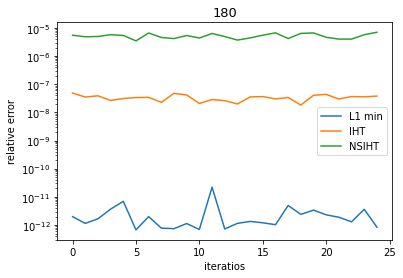

In [54]:
relative_error(diff_l1,diff_iht,diff_nsiht,N_mc,m)

Comparison of algorithms for s=5

In [55]:
m=200
N=200
s=5
N_mc=25

In [56]:
m_val,prob_l1,diff_l1,resi_2=l1_minimization(m,N,s,N_mc)

In [57]:
m_ih,prob_iht,diff_iht,resi_2=IHT(m,N,s,N_mc,1)

In [58]:
m_ns,prob_nsiht,diff_nsiht,resi_2=NSIHT(m,N,s,N_mc,1,1)

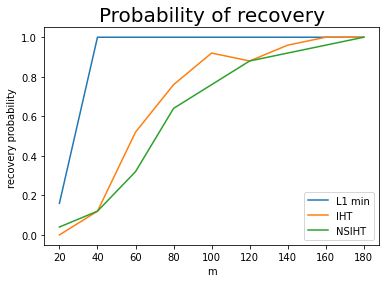

In [59]:
recovery_plots(m_val,prob_l1,prob_iht,prob_nsiht)

ERROR IN RECOVERY AT DIFFERENT VALUES FOR m


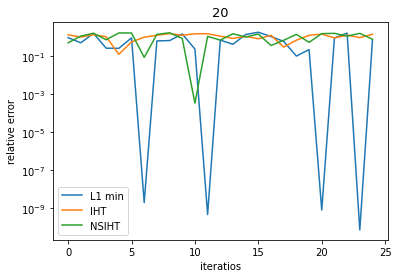

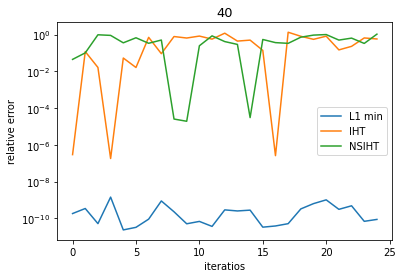

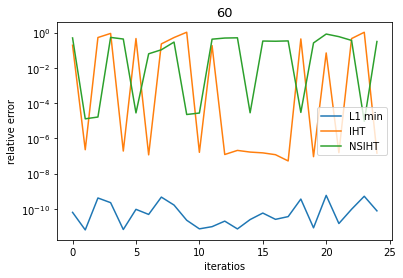

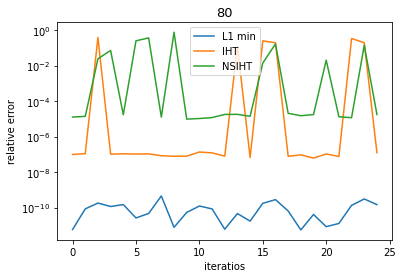

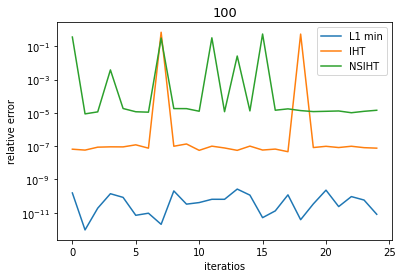

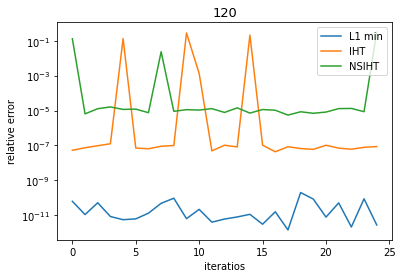

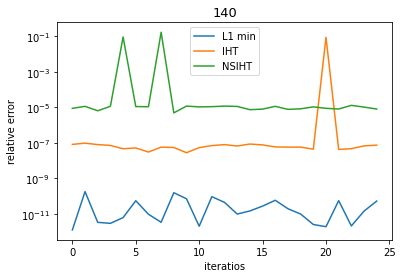

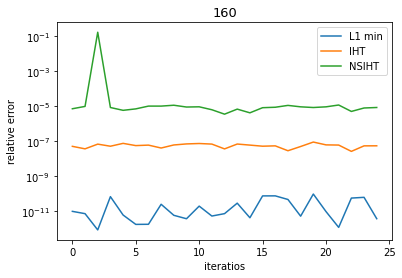

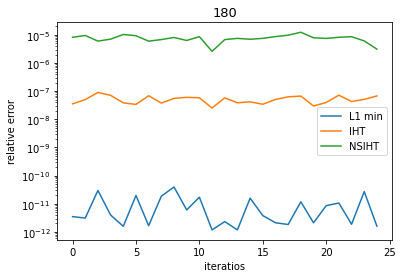

In [60]:
relative_error(diff_l1,diff_iht,diff_nsiht,N_mc,m)

In [20]:
print("SOURCES")
display(HTML("""<a href="https://users.math.msu.edu/users/iwenmark/Teaching/MTH994/Holger_Simon_book.pdf">Simon Foucart, Holger Rauhut. "A Mathematical Introduction to Compressive Sensing". 2013
</a>"""))

display(HTML("""<a href="hhttps://www.sciencedirect.com/science/article/pii/S1063520309000384">Thomas Blumensath, Mike E. DavieS. "Iterative hard thresholding for compressed sensing"</a>"""))

display(HTML("""<a href="https://arxiv.org/pdf/2001.07181.pdf">Nan Meng, Yun-Bin Zhao. "Newton-Step-Based Hard Thresholding Algorithms for Sparse Signal Recovery"
</a>"""))

SOURCES
